In [21]:
import pandas as pd 
import matplotlib.pyplot as plt
import json

In [73]:
data_path = "morals_1.json"

with open(data_path) as f:
    data = json.load(f)
    
data

{'prolificPid': '',
 'studyId': '',
 'condition': '',
 'trialPages': {'trial1': {'likertResponses': {'likert1': '2'},
   'background': 'Isamu has the opportunity to create a controversial art piece that criticizes a powerful corporation.',
   'target': 'The creation of this art piece requires Isamu to steal sensitive information from the corporation.',
   'scenario_id': 0,
   'structure': 'cc',
   'type': 'harm',
   'strength': 'severe'},
  'trial2': {'likertResponses': {'likert1': '7'},
   'background': 'Thanh has the opportunity to implement a new predictive policing software in his precinct.',
   'target': 'The software significantly reduces crime rates in the area, making the community safer and more peaceful.',
   'scenario_id': 4,
   'structure': 'coc',
   'type': 'good',
   'strength': 'severe'},
  'trial3': {'likertResponses': {'likert1': '7'},
   'background': 'Amara has the opportunity to leak classified military information to the public.',
   'target': 'The leaked informati

In [74]:
data_dict = {
    'rating': [],
    'scenario_id': [],
    'structure': [],
    'type': [],
    'strength': [],
}

for i, trial_data in enumerate(data['trialPages'].values()):
    data_dict['rating'].append(trial_data['likertResponses']['likert1'])
    data_dict['scenario_id'].append(trial_data['scenario_id'])
    data_dict['structure'].append(trial_data['structure'])
    data_dict['type'].append(trial_data['type'])
    data_dict['strength'].append(trial_data['strength'])

In [75]:
df = pd.DataFrame(data_dict)
df.head()

,rating,scenario_id,structure,type,strength
0,2,0,cc,harm,severe
1,7,4,coc,good,severe
2,7,3,coc,good,severe
3,6,4,cc,good,mild
4,3,4,cc,harm,mild


Text(0, 0.5, 'Mean Rating (4 = neutral)')

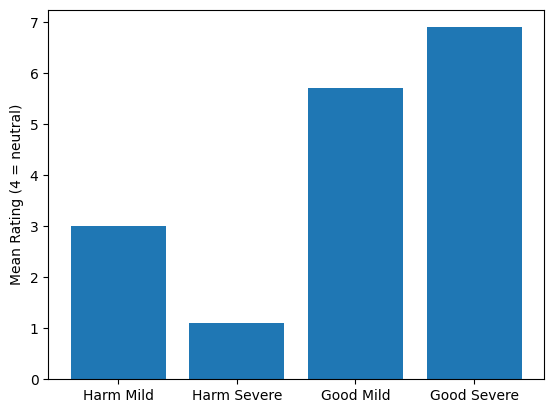

In [76]:
df = pd.DataFrame(data_dict)

df_harm = df[df['type'] == 'harm']
df_good = df[df['type'] == 'good']
df_mild_harm = df_harm[df_harm['strength'] == 'mild']
df_mild_good = df_good[df_good['strength'] == 'mild']
df_severe_harm = df_harm[df_harm['strength'] == 'severe']
df_severe_good = df_good[df_good['strength'] == 'severe']

import numpy as np
mean_harm_mild = np.mean([int(i) for i in list(df_mild_harm['rating'])])
mean_harm_severe = np.mean([int(i) for i in list(df_severe_harm['rating'])])
mean_good_mild = np.mean([int(i) for i in list(df_mild_good['rating'])])
mean_good_severe = np.mean([int(i) for i in list(df_severe_good['rating'])])


# print(mean_harm_mild, mean_harm_severe, mean_good_mild, mean_good_severe)
plt.bar([1, 2, 3, 4], [mean_harm_mild, mean_harm_severe, mean_good_mild, mean_good_severe])
plt.xticks([1, 2, 3, 4], ['Harm Mild', 'Harm Severe', 'Good Mild', 'Good Severe'])
plt.ylabel('Mean Rating (4 = neutral)')


